# Baseline examples

Charles Le Losq

August 2017; updated February 2019

Examples of using the baseline function with various algorithms (splines, polynomials, ALS, arPLS...)

## Documentation

See http://charlesll.github.io/Spectra.jl/stable/ for information about spectra.

## References

a good read about the ALS and arPLS algorithms is 

    Baek, S.-J., A. Park, Y.-J. Ahn, and J. Choo (2015), Baseline correction using asymmetrically reweighted penalized least squares smoothing, Analyst, 140(1), 250–257, doi:10.1039/C4AN01061B.

## Importing the relevant libraries

In [4]:
# The Julia library to treat Raman spectroscopy data
using Spectra

# to plot stuffs
using PyPlot

# we need the Random library
using Random

## Creating a fake signal to know the ground truth

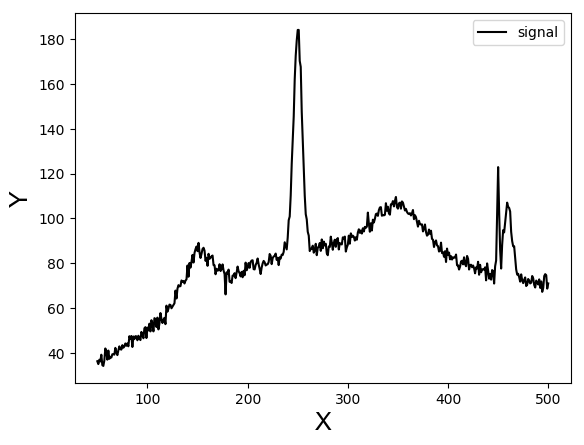

PyObject Text(33,0.5,'Y')

In [5]:
x = collect(50:1.0:500)

# 5 gaussian peaks
p1 = 20.0 .* exp.(-log(2) .* ((x .-150.0)./15.0).^2)
p2 = 100.0 .* exp.(-log(2) .* ((x .-250.0)./5.0).^2)
p3 = 50.0 .* exp.(-log(2) .* ((x .-450.0)./1.0).^2)
p4 = 20.0 .* exp.(-log(2) .* ((x .-350.0)./30.0).^2)
p5 = 30.0 .* exp.(-log(2) .* ((x .-460.0)./5.0).^2)

# some background: a large gaussian + linear 
bkg = 60.0 .* exp.(-log(2) .* ((x .-250.0)./200.0).^2) .+ 0.1.*x

# some noise
noise = 2.0 * randn!(ones(size(x,1)))

# the observation
y = p1 + p2 + p3 + p4 + p5 + noise +bkg

# making a plot
plot(x,y,"k-",label="signal")
legend()
xlabel("X",fontname="Arial",fontsize=18)
ylabel("Y",fontname="Arial",fontsize=18)

## Calling the baseline() function to remove the background

see documentation at http://charlesll.github.io/Spectra.jl/stable/PreProcessing/#baseline-subtraction

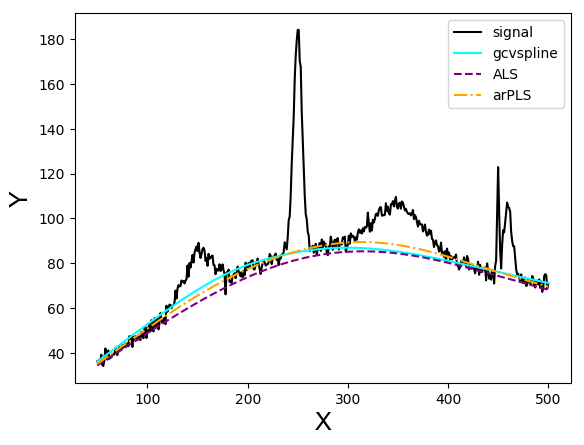

PyObject Text(33,0.5,'Y')

In [12]:
# We define the portions of the spectra where we want to fit the signal background.
# roi should be an n x 2 array, see documentation at 
roi = [0 100.;200 220;280 290;420 430; 480 500]

# caling the baseline function with a natural spline that will fit the signal in ROIs
y_gcvspl, bas_gcvspl = baseline(x,y,roi,"gcvspline",s=1.)

# using the ALS algorithm (Baek et al. 2015), 10^2-10^5 lambda and 0.001-0.1 p values are recommended
y_als, bas_als = baseline(x,y,roi,"als",p=0.01,lam=10^6,niter=10)

# using the arPLS algorithm (Baek et al. 2015)
y_arpls, bas_arpls = baseline(x,y,roi,"arPLS",p=0.1,lam=10.0^6)

figure()

# plotting the initial signal and the roi
plot(x,y,"black",label="signal")

# plotting the baselines
plot(x,bas_gcvspl,"cyan",label="gcvspline")
plot(x,bas_als,"purple",linestyle="--",label="ALS")
plot(x,bas_arpls,"orange",linestyle="-.",label="arPLS")
legend()

xlabel("X",fontname="Arial",fontsize=18)
ylabel("Y",fontname="Arial",fontsize=18)